In [1]:
%matplotlib nbagg
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random


In [2]:
#year,eco,kind,count,outof,proportion
#1970,Rubygems,release,1,1,1.0
#1970,Rubygems,same,0,1,0.0
#1970,Rubygems,backport,0,1,0.0
#1970,Ruby

eco_releases = pd.read_csv("../data/laptop/releases.csv",skipinitialspace=True)
eco_releases.set_index(["year","eco","kind"],inplace=True)#, drop=True, inplace=True)
clean_eco_releases = \
    eco_releases.loc[(eco_releases.index.get_level_values('eco') != "Packagist") & 
                     (eco_releases.index.get_level_values('year') > 1999)]
clean_eco_releases.head(20)

count  outof  proportion
year eco      kind                                 
2000 Rubygems release          1      1    1.000000
              same             0      1    0.000000
              backport         0      1    0.000000
              major            0      1    0.000000
              minor            0      1    0.000000
              patch            0      1    0.000000
              alpha            0      1    0.000000
              subpatch         0      1    0.000000
              subsubpatch      0      1    0.000000
              unknown          0      1    0.000000
              first            1      1    1.000000
     CPAN     release       2866   1019    2.812561
              same            21   1019    0.020608
              backport        64   1019    0.062807
              major           93   1019    0.091266
              minor         2028   1019    1.990186
              patch           70   1019    0.068695
              alpha            0   1019    0.000000
              subpatch         0   1019    0.000000
              subsubpatch      0   1019    0.000000

In [3]:
eco_properties = clean_eco_releases.unstack()["proportion"]

In [4]:
eco_properties.head()

kind              alpha  backport     first     major     minor     patch  \
year eco                                                                    
2000 Rubygems  0.000000  0.000000  1.000000  0.000000  0.000000  0.000000   
     CPAN      0.000000  0.062807  0.578999  0.091266  1.990186  0.068695   
     CRAN      1.050847  0.016949  0.440678  0.101695  0.406780  0.000000   
2001 Rubygems  0.000000  0.000000  1.000000  0.000000  0.000000  0.000000   
     CPAN      0.001919  0.062060  0.621241  0.095969  2.184261  0.122201   

kind            release      same  subpatch  subsubpatch  unknown  
year eco                                                           
2000 Rubygems  1.000000  0.000000  0.000000          0.0      0.0  
     CPAN      2.812561  0.020608  0.000000          0.0      0.0  
     CRAN      2.016949  0.000000  0.000000          0.0      0.0  
2001 Rubygems  1.000000  0.000000  0.000000          0.0      0.0  
     CPAN      3.129878  0.037748  0.004479          0.0      0.0

In [5]:
def doplot(ax, ylog=False):
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')  # legend for first two lines only
    if ylog: ax.set_yscale("log")
def doplot2(plotfn, title):
    #fig = plt.figure()
    #ax = fig.add_axes([0.1, 0.1, 0.6, 0.85])
    plotfn(ax)
    ax.title.set_text(title)
    #fig.legend(loc="upper left", bbox_to_anchor=(1,1))    
    #fig.tight_layout()
    #fig.show()

<IPython.core.display.Javascript object>


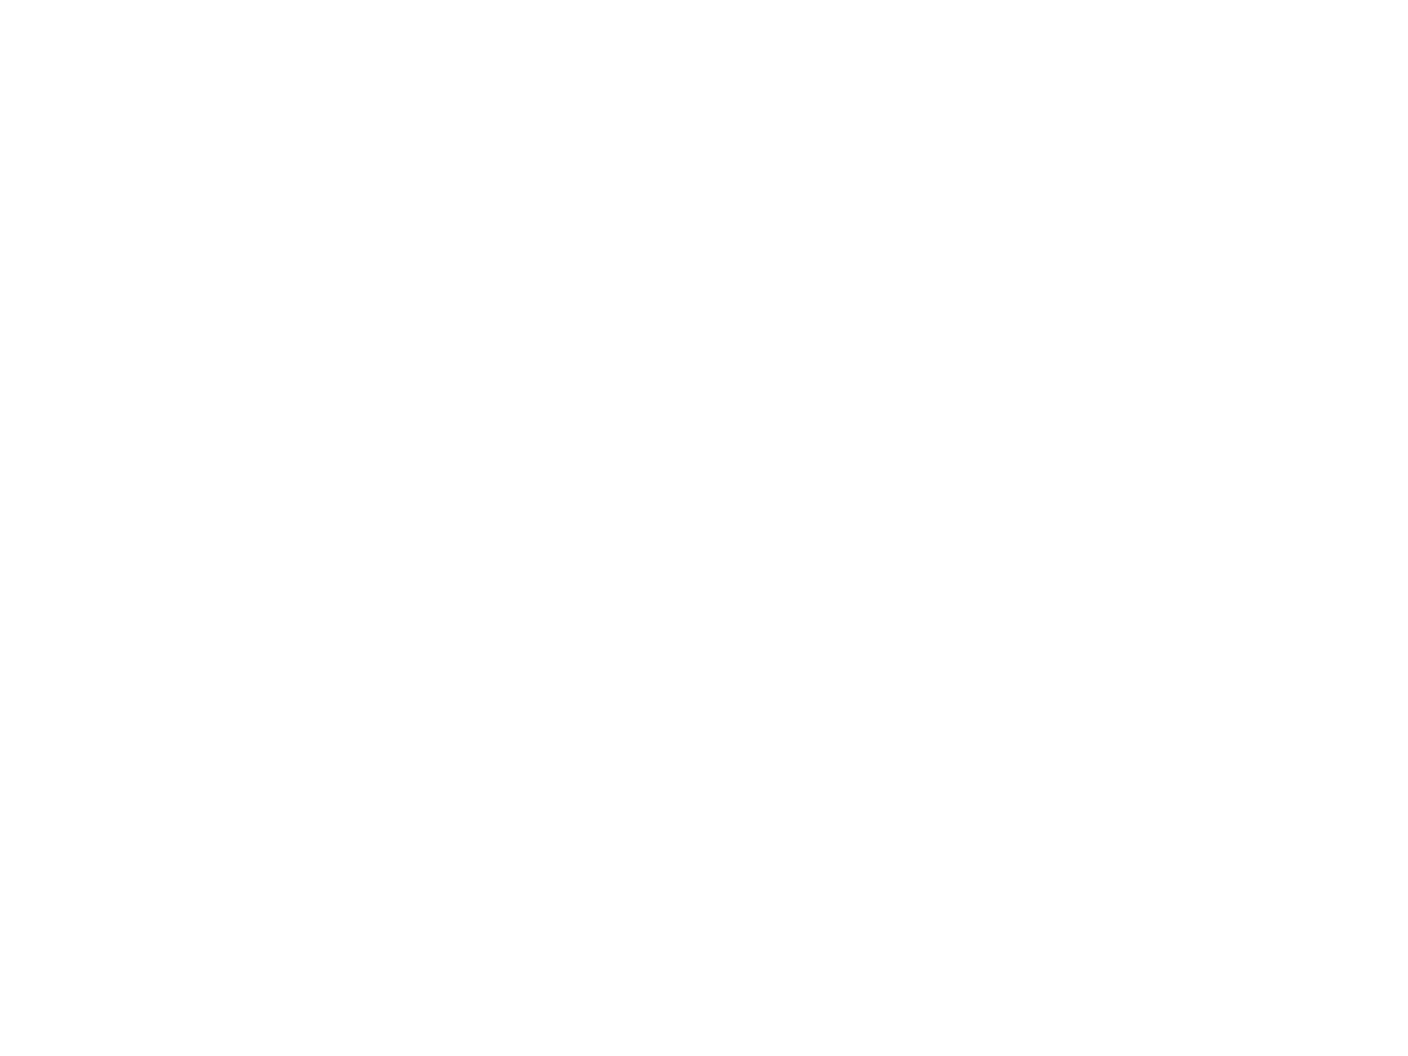

In [6]:
doplot(eco_properties.unstack(level=-1)["release"].plot(kind='line', title="Average release frequency"))

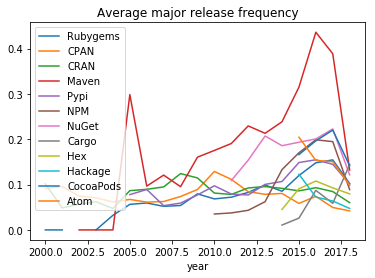

In [7]:
%matplotlib inline
doplot(eco_properties.unstack(level=-1)["major"].plot(kind='line', title="Average major release frequency"))

In [8]:
eco_properties["major_ratio"] = eco_properties["major"]/eco_properties["release"]
eco_properties["backport_ratio"] = eco_properties["backport"]/eco_properties["release"]
eco_properties["minor_ratio"] = eco_properties["minor"]/eco_properties["release"]
eco_properties["patch_ratio"] = eco_properties["minor"]/eco_properties["release"]
eco_properties["subpatch_ratio"] = eco_properties["subpatch"]/eco_properties["release"]
eco_properties["subsubpatch_ratio"] = eco_properties["subsubpatch"]/eco_properties["release"]
eco_properties["first_ratio"] = eco_properties["first"]/eco_properties["release"]
eco_properties["same_ratio"] = eco_properties["same"]/eco_properties["release"]
eco_properties["alpha_ratio"] = eco_properties["alpha"]/eco_properties["release"]


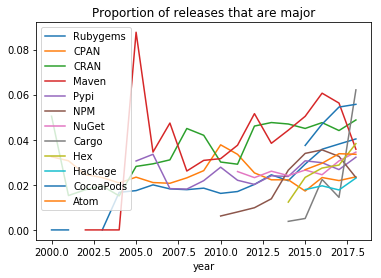

In [9]:
%matplotlib inline
doplot(eco_properties.unstack(level=-1)["major_ratio"].plot(kind='line', title="Proportion of releases that are major"))

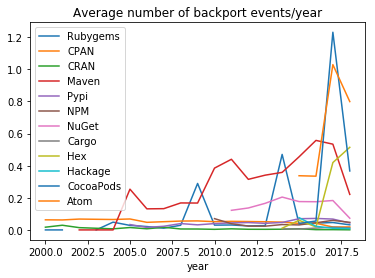

In [10]:
%matplotlib inline
doplot(eco_properties.unstack(level=-1)["backport"].plot(kind='line',title="Average number of backport events/year"))

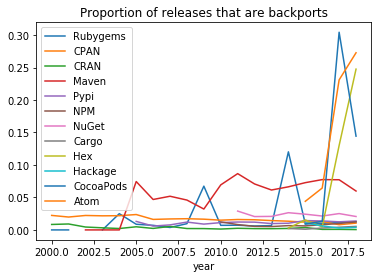

In [11]:
doplot(eco_properties.unstack(level=-1)["backport_ratio"].plot(kind='line', title="Proportion of releases that are backports"))

In [12]:
#../data/laptop/pkg_releases.csv
#year,eco,kind,package,count
#1970,Rubygems,release,nakilon,1

#pkg_releases = pd.DataFrame(np.genfromtxt('../data/laptop/pkg_releases.csv', dtype=str)[1:],
#                            columns="year,eco,kind,package,count".split(","))
#pd.read_csv("../data/laptop/pkg_releases.csv",
#                           dtype=[("year",np.str),("eco",np.str),("kind",np.str),
#                                  ("package",np.str ),("count",np.int64)], skipinitialspace=True)

pkg_releases = pd.read_csv("../data/laptop/pkg_releases.csv",keep_default_na=False, na_values=[''], skipinitialspace=True)

In [13]:
len(set(pkg_releases.package))

1418186

In [14]:
pkg_releases.set_index(["year","eco","package","kind"], inplace=True)

In [15]:
pkg_properties = pkg_releases.unstack()["count"]

In [16]:
pkg_properties.head()

kind                            alpha  backport  first  major  minor  patch  \
year eco       package                                                        
1994 Packagist maiden/maiden        0         0      1      0      0      1   
1995 CPAN      Alias                0         0      1      1      1      0   
               Ar                   0         0      1      0      0      0   
               Array-PrintCols      0         0      1      0      0      0   
               CGI                  0         0      1      0      1      0   

kind                            release  same  subpatch  subsubpatch  unknown  
year eco       package                                                         
1994 Packagist maiden/maiden          2     0         0            0        0  
1995 CPAN      Alias                  3     0         0            0        0  
               Ar                     1     0         0            0        0  
               Array-PrintCols        1     0         0            0        0  
               CGI                    2     0         0            0        0

In [17]:
pkg_properties["major_ratio"] = pkg_properties["major"]/pkg_properties["release"]
pkg_properties["backport_ratio"] = pkg_properties["backport"]/pkg_properties["release"]
pkg_properties["minor_ratio"] = pkg_properties["minor"]/pkg_properties["release"]
pkg_properties["patch_ratio"] = pkg_properties["patch"]/pkg_properties["release"]
pkg_properties["subpatch_ratio"] = pkg_properties["subpatch"]/pkg_properties["release"]
pkg_properties["subsubpatch_ratio"] = pkg_properties["subsubpatch"]/pkg_properties["release"]
pkg_properties["first_ratio"] = pkg_properties["first"]/pkg_properties["release"]
pkg_properties["same_ratio"] = pkg_properties["same"]/pkg_properties["release"]
pkg_properties["alpha_ratio"] = pkg_properties["alpha"]/pkg_properties["release"]


In [18]:
pkg_properties.head(30)

kind                             alpha  backport  first  major  minor  patch  \
year eco       package                                                         
1994 Packagist maiden/maiden         0         0      1      0      0      1   
1995 CPAN      Alias                 0         0      1      1      1      0   
               Ar                    0         0      1      0      0      0   
               Array-PrintCols       0         0      1      0      0      0   
               CGI                   0         0      1      0      1      0   
               CGI-Response          0         0      1      0      0      0   
               CallerItem            0         0      1      0      0      0   
               Curses                0         0      1      0      0      0   
               DBD-QBase             0         0      1      0      0      0   
               DBI                   0         0      1      0      0      0   
               Data-Dumper           0         0      1      0      2      0   
               Des-perl              0         0      1      0      0      0   
               DumpStack             0         0      1      0      0      0   
               FileKGlob             0         0      1      0      0      0   
               Filter                0         0      1      0      2      0   
               Getopt-Regex          0         0      1      0      0      0   
               HTML                  0         0      1      0      0      0   
               IPC_SysV              0         0      1      0      0      0   
               InitializeServer      0         0      1      0      0      0   
               MD5                   0         0      1      0      1      0   
               MailTools             0         0      1      0      1      0   
               Math-Amoeba           0         0      1      0      0      0   
               Math-Approx           0         0      1      0      0      0   
               Math-Brent            0         0      1      0      0      0   
               Math-Derivative       0         0      1      0      0      0   
               Math-Fortran          0         0      1      0      0      0   
               Math-Mathematica      0         0      1      0      0      1   
               Math-Matrix           0         0      1      0      0      0   
               Math-Spline           0         0      1      0      0      0   
               NIS                   0         0      1      1      0      0   

kind                             release  same  subpatch  subsubpatch  \
year eco       package                                                  
1994 Packagist maiden/maiden           2     0         0            0   
1995 CPAN      Alias                   3     0         0            0   
               Ar                      1     0         0            0   
               Array-PrintCols         1     0         0            0   
               CGI                     2     0         0            0   
               CGI-Response            1     0         0            0   
               CallerItem              1     0         0            0   
               Curses                  1     0         0            0   
               DBD-QBase               1     0         0            0   
               DBI                     1     0         0            0   
               Data-Dumper             3     0         0            0   
               Des-perl                1     0         0            0   
               DumpStack               1     0         0            0   
               FileKGlob               1     0         0            0   
               Filter                  3     0         0            0   
               Getopt-Regex            1     0         0            0   
               HTML                    1     0         0            0   
               IPC_SysV                1     0      

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


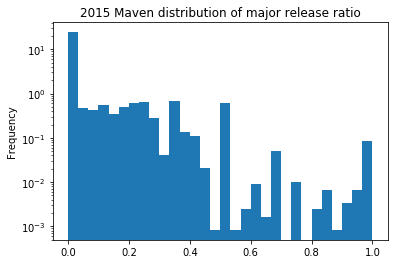

In [19]:
%matplotlib inline
active = pkg_properties["release"] > 1
pkg_properties[active].loc[(2015,"Maven"),"major_ratio"].plot.hist(normed=True, title="2015 Maven distribution of major release ratio", bins=30)
plt.gca().set_yscale("log")

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


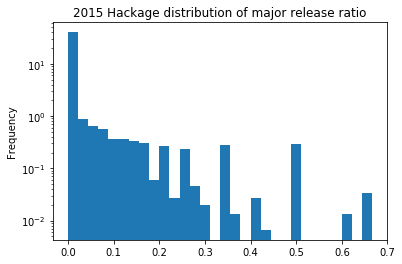

In [20]:
%matplotlib inline
active = pkg_properties["release"] > 1
pkg_properties[active].loc[(2015,"Hackage"),"major_ratio"].plot.hist(normed=True, title="2015 Hackage distribution of major release ratio", bins=30)
plt.gca().set_yscale("log")

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


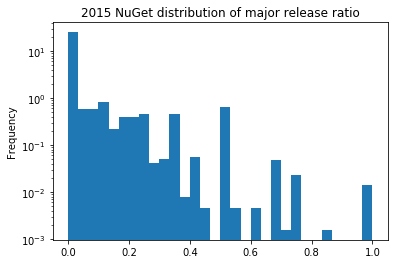

In [21]:
%matplotlib inline
active = pkg_properties["release"] > 1
pkg_properties[active].loc[(2015,"NuGet"),"major_ratio"].plot.hist(normed=True, title="2015 NuGet distribution of major release ratio", bins=30)
plt.gca().set_yscale("log")

In [22]:
import csv
package2repo = {}
repo2package = {}
mapping = csv.DictReader(open("../data/laptop/mapping.csv")) #host,repo,ecosystem,packageID,packageName
packages_sharing_a_repo = set()
repos_with_multi_packages = set()
all_repos = set()
all_packages= set()
for m in mapping:
    e = m["ecosystem"]
    if e not in package2repo: package2repo[e] = {}
    if e not in repo2package: repo2package[e] = {}
    package2repo[e][m["packageName"]] = m["repo"]
    all_packages.add(m["packageName"])
    all_repos.add(m["repo"])
    if m["repo"] not in repo2package[e]:   #Just save the first one
        repo2package[e][m["repo"]] = m["packageName"]
    else:
        packages_sharing_a_repo.add(m["packageName"])
        repos_with_multi_packages.add(m["repo"])
        
print("packages_co_repo'ed", len(packages_sharing_a_repo),"out of",len(all_packages), "(from pkg_releases:", len(set(pkg_releases.package)))
print("repos with multi packages",len(repos_with_multi_packages),"out of",len(all_repos))

AttributeError: 'DataFrame' object has no attribute 'package'

In [269]:
#focal_eco = "NuGet"
#infl_eco = "NPM"

def eco_infl_properties(infl_eco, focal_eco):
    i = pd.read_csv("../data/laptop/infl/infl_pkg_normalized_" + infl_eco + "_to_" + focal_eco + ".csv.gz", compression="gzip")  # year, package, influence
    i.rename(columns={"package":"repo","influence":"influence_raw"},inplace=True)
    i.rename(columns={"infl_normalized":"influence"},inplace=True)
    
    i["package"] = i.apply(lambda row: repo2package[focal_eco].get(row["repo"],"MISSING"), axis=1)
    i.set_index(["year","package"],inplace=True)
    p1 = pkg_properties.xs(focal_eco,level="eco")
    p2 = pd.merge(p1,i, left_on=["year","package"], right_on=["year","package"])
    
    
    return p2
qq = eco_infl_properties("NuGet","NPM")#.head()

In [270]:
#qq["influence"].groupby(["year"]).median()

year
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
Name: influence, dtype: float64

In [134]:
%matplotlib inline
active = qq["release"] > 1
qq["influence_high"] = qq["influence"] > qq["influence"].median()
qq["major_ratio_high"] = qq["major_ratio"] > qq["major_ratio"].median()
#qq[active].loc[2013,:].groupby(["influence_high","major_ratio_high"])["major_ratio"].plot.hist(title="2013 NuGet distribution of major release ratio", bins=30, stacked=True)
contrast = qq[active].loc[2013,:].groupby(["influence_high","major_ratio_high"])["major_ratio"].count()

In [135]:
from scipy.stats import chi2_contingency
chi2_contingency(contrast.unstack("major_ratio_high"))

(137.0179270971156,
 1.1950133827403592e-31,
 1,
 array([[12573.93007896,  1028.06992104],
        [ 6041.06992104,   493.93007896]]))

In [78]:
contrast.unstack("major_ratio_high")


major_ratio_high,False,True
influence_high,,
False,1480,195
True,472,95


NuGet packages with high influence from NPM are more likely to have a high ratio of major releases. p=.002

In [79]:
472.0*195/1480

62.189189189189186

In [172]:
pd.options.mode.chained_assignment = None
# KEEPER Check influence for a particular YEAR
def check_influence(from_eco, to_eco, year, practice):
    infla = eco_infl_properties(from_eco, to_eco)
    infl = infla[infla["release"] > 1]
    #active = True #infl["release"] > 1
    iy = infl.xs(year,level=0)["influence"]
    hiy = iy[iy > iy.median()].index.values
    #print("Median", iy.median(), hiy)
    #print(hiy)
    infl["influence_high"] = infl.index.get_level_values(1).isin(hiy)
    
    infl[practice + "_high"] = infl[practice] > infl[practice].median()

    try:
        contrast = infl.loc[year,:].groupby(["influence_high",practice + "_high"])[practice].count()
        print(infl.loc[year,:].groupby(["influence_high",practice + "_high"])[practice].size())
        tbl = contrast.unstack(practice + "_high")
        print(tbl)
        x2 = chi2_contingency(tbl)
        print(x2)
        expected = tbl.iloc[1,0]*1.0*tbl.iloc[0,1]/tbl.iloc[0,0]
        offset = tbl.iloc[1,1] - expected
        direction = "**more**" if offset>0 else "**less**"
        if True or x2[1] < .05:
            print("In",year,to_eco,"packages with high influence from",from_eco,
                 "are",direction,"likely to have high level of",practice," @ p=",x2[1])
        else:
            print("In",year,to_eco,"nothing can be concluded about packages with high influence from",from_eco,
                 "and their effect on",direction,"the level of",practice," @ XXX p=",x2[1])
        print (expected, offset,"\n")#, tbl)
        print ("Average high level is ",infl.loc[year,:].groupby(["influence_high",practice + "_high"])[practice].mean())
    except Exception as e:
        print ("Failed to do check", e)
    return infl
x = check_influence("NuGet","CRAN",2015,"major_ratio")

Median 0.0 ['DiagrammeR' 'EFDR' 'FeatureHashing' 'GERGM' 'OECD' 'ParamHelpers'
 'Quandl' 'R.matlab' 'R6' 'RBPcurve' 'RMySQL' 'RNeo4j' 'RSocrata'
 'RcppParallel' 'Rdistance' 'V8' 'apex' 'aqp' 'backpipe' 'broom'
 'checkmate' 'checkpoint' 'covr' 'crayon' 'curl' 'd3heatmap' 'devtools'
 'dotwhisker' 'dplyr' 'dygraphs' 'eurostat' 'evolqg' 'flacco'
 'formula.tools' 'ggmap' 'ggthemes' 'git2r' 'gpuR' 'haven' 'htmltab'
 'htmlwidgets' 'httr' 'infuser' 'injectoR' 'iptools' 'jug' 'lintr'
 'manifestoR' 'mbest' 'metricsgraphics' 'mlr' 'mmod' 'mongolite'
 'mvtboost' 'netgen' 'openssl' 'packrat' 'pacman' 'pageviews' 'pander'
 'parallelMap' 'plspm' 'pollstR' 'progress' 'protr' 'pryr' 'qdap'
 'qdapDictionaries' 'qdapRegex' 'quanteda' 'rLTP' 'randomNames' 'rcorpora'
 'readr' 'regexr' 'rentrez' 'rgeolocate' 'rhandsontable' 'rncl' 'roxygen2'
 'rstudioapi' 'rsunlight' 'rversions' 'rvest' 'scales' 'scrm' 'searchable'
 'sharpshootR' 'shinydashboard' 'simmer' 'smoof' 'solarius' 'spdynmod'
 'tcR' 'testthat' 'tex

In [273]:
pd.options.mode.chained_assignment = None
# KEEPER Check influence for a particular YEAR
def check_influence_yearly(from_eco, to_eco, year, practice):
    infla = eco_infl_properties(from_eco, to_eco)
    infl = infla[infla["release"] > 1]
    
    #print("Median", iy.median(), hiy)
    #print(hiy)
    infl["influence_high"] = infl["influence"] > 0.0#.index.get_level_values(1).isin(hiy)
    
    infl[practice + "_high"] = infl[practice] > infl[practice].median()

    try:
        contrast = infl.loc[year,:].groupby(["influence_high",practice + "_high"])[practice].count()
        print(infl.loc[year,:].groupby(["influence_high",practice + "_high"])[practice].size())
        tbl = contrast.unstack(practice + "_high")
        print(tbl)
        x2 = chi2_contingency(tbl)
        print(x2)
        expected = tbl.iloc[1,0]*1.0*tbl.iloc[0,1]/tbl.iloc[0,0]
        offset = tbl.iloc[1,1] - expected
        direction = "**more**" if offset>0 else "**less**"
        if True or x2[1] < .05:
            print("In",year,to_eco,"packages with high influence from",from_eco,
                 "are",direction,"likely to have high level of",practice," @ p=",x2[1])
        else:
            print("In",year,to_eco,"nothing can be concluded about packages with high influence from",from_eco,
                 "and their effect on",direction,"the level of",practice," @ XXX p=",x2[1])
        print (expected, offset,"\n")#, tbl)
        print ("Average high level is ",infl.loc[year,:].groupby(["influence_high",practice + "_high"])[practice].mean())
    except Exception as e:
        print ("Failed to do check", e)
    return infl
x = check_influence_yearly("NuGet","CRAN",2015,"major_ratio")

influence_high  major_ratio_high
False           False               426
                True                 49
True            False                93
                True                 10
Name: major_ratio, dtype: int64
major_ratio_high  False  True 
influence_high                
False               426     49
True                 93     10
(2.469207620280981e-05, 0.9960352383993241, 1, array([[426.51384083,  48.48615917],
       [ 92.48615917,  10.51384083]]))
In 2015 CRAN packages with high influence from NuGet are **less** likely to have high level of major_ratio  @ p= 0.9960352383993241
10.69718309859155 -0.6971830985915499 

Average high level is  influence_high  major_ratio_high
False           False               0.000000
                True                0.359086
True            False               0.000000
                True                0.329286
Name: major_ratio, dtype: float64


In [81]:
check_influence("CRAN","NuGet",2015,"major_ratio")

influence_high  major_ratio_high
False           False               4297
                True                 832
True            False                 26
                True                   9
Name: major_ratio, dtype: int64
major_ratio_high  False  True 
influence_high                
False              4297    832
True                 26      9
(1.6541724151677166, 0.198391993144448, 1, array([[4293.70003873,  835.29996127],
       [  29.29996127,    5.70003873]]))
In 2015 NuGet packages with high influence from CRAN are **more** likely to have high level of major_ratio  @ p= 0.198391993144448
5.034209913893414 3.965790086106586 
 major_ratio_high  False  True 
influence_high                
False              4297    832
True                 26      9


alpha  backport  first  major  minor  patch  \
year package                                                                 
2011 AE.Net.Mail                   0         0      1      0      5     11   
     AeroWizard                    0         0      1      0      1      0   
     Afterthought                  0         0      1      0      0      7   
     Agdur                         0         0      1      0      1      0   
     AjaxControlToolkit            0         0      1      1      0      4   
     Algorim.CreoleWiki            0         0      1      0      0      2   
     AnglicanGeek.Mvc              0         0      1      0      2      0   
     Anna                          0         0      1      0      0      5   
     Args                          0         0      1      0      0      4   
     AshMind.Extensions            0         0      1      0      0      1   
     Aspirator.MVC3                0         0      1      0      1      0   
     AutoBox                       0         0      1      1      0      3   
     AutoDiff                      0         1      0      0      2      1   
     AutoMapperAssist              0         0      1      1      0      0   
     AutoMoq                       0         0      1      0      3      3   
     AutoObjectBuilder             0         0      1      0      0      0   
     BDDify                        0         0      1      1     12      4   
     BDDish                        0         0      1      0      0      1   
     BLToolkit.Firebird            0         0      1      0      0      0   
     Backbone.js                   0         0      1      0      1      0   
     BingGeocodingHelper           0         0      1      0      1      0   
     Blocks.Mvvm                   0         0      1      0      0      2   
     Brevity                       0         0      1      0      2      0   
     BruTile                       0         1      0      0      1      0   
     Burro                         0         0      1      0      2     11   
     BuzzIO                        0         0      1      0      0      2   
     CLAP                          0         1      1      2     16      1   
     Caliburn.Micro.Logging        0         0      1      0      2      1   
     Caliburn.Micro.Telerik        0         0      1      0      3      3   
     Canonicalize                  0         0      1      1      1      0   
...                              ...       ...    ...    ...    ...    ...   
2018 prometheus-net                7         0      0      1      0      0   
     recurly-api-client            0         0      0      0      1      1   
     robertturner.BaseLibs         0         0      1      0      0      6   
     sachiel-net                   0         0      0      0      2      1   
     scanpay                       0         0      1      0      0      6   
     servicehost                   0         0      0      0      2      1   
     shadowBasic                   0         0      1      0      0      1   
     sharpconfig                   0         0      0      0      0      1   
     shippingapi                   0         0      0      0      0      4   
     silverpop-dotnet-api          0         0      0      0      0      2   
     sly                           0         0      0      0      0      4   
     socket.core                   0         0      0      0      0     13   
     somostechies.facebook         0         0      1      0      2      2   
     source-rcon-server            0         1      0      0      3      1   
     sqlSugarCore                  0         0      0      0      0      1   
     streamdecksharp               0         0      0      0      0      5   
     swigged.cuda                  0         0      0      0      1      0   
     swigged.llvm                  0         0      0      1      0      1   
     teamleader-dotnet             0         0      0

In [82]:
for y in range(2011,2018):
    check_influence("NuGet","NPM",y,"backport_ratio")

influence_high  backport_ratio_high
False           False                  1706
                True                     71
True            False                   497
                True                     49
Name: backport_ratio, dtype: int64
backport_ratio_high  False  True 
influence_high                   
False                 1706     71
True                   497     49
(20.130468762278348, 7.2335121984750574e-06, 1, array([[1685.20490745,   91.79509255],
       [ 517.79509255,   28.20490745]]))
In 2011 NPM packages with high influence from NuGet are **more** likely to have high level of backport_ratio  @ p= 7.2335121984750574e-06
20.68405627198124 28.31594372801876 
 backport_ratio_high  False  True 
influence_high                   
False                 1706     71
True                   497     49
influence_high  backport_ratio_high
False           False                  4411
                True                     82
True            False                  2978
         

In [83]:
for y in range(2011,2018):
    check_influence("NPM","CRAN",y,"major_ratio")

influence_high  major_ratio_high
False           False               87
                True                 7
True            False                2
Name: major_ratio, dtype: int64
major_ratio_high  False  True 
influence_high                
False              87.0    7.0
True                2.0    NaN
(nan, nan, 1, array([[nan, nan],
       [nan, nan]]))
In 2011 CRAN packages with high influence from NPM are **less** likely to have high level of major_ratio  @ p= nan
0.16091954022988506 nan 
 major_ratio_high  False  True 
influence_high                
False              87.0    7.0
True                2.0    NaN


/usr/local/lib/python3.7/site-packages/scipy/stats/contingency.py:242: RuntimeWarning: invalid value encountered in less
  if np.any(observed < 0):


influence_high  major_ratio_high
False           False               100
                True                 10
True            False                10
                True                  4
Name: major_ratio, dtype: int64
major_ratio_high  False  True 
influence_high                
False               100     10
True                 10      4
(2.9616528925619843, 0.0852607414976105, 1, array([[97.58064516, 12.41935484],
       [12.41935484,  1.58064516]]))
In 2012 CRAN packages with high influence from NPM are **more** likely to have high level of major_ratio  @ p= 0.0852607414976105
1.0 3.0 
 major_ratio_high  False  True 
influence_high                
False               100     10
True                 10      4
influence_high  major_ratio_high
False           False               185
                True                 19
True            False                22
                True                  2
Name: major_ratio, dtype: int64
major_ratio_high  False  True 
influence_high 

In [90]:
check_influence("NPM","Maven",2016,"release")

influence_high  release_high
False           False           664
                True            742
True            False           602
                True            804
Name: release, dtype: int64
release_high    False  True 
influence_high              
False             664    742
True              602    804
(5.34603491863015, 0.020769450781778755, 1, array([[633., 773.],
       [633., 773.]]))
In 2016 Maven packages with high influence from NPM are **more** likely to have high level of release  @ p= 0.020769450781778755
672.7168674698795 131.2831325301205 



alpha  backport  \
year package                                                               
2005 cglib:cglib-nodep                                       2         0   
     dnsjava:dnsjava                                         0         0   
     joda-time:joda-time                                     0         0   
     org.codehaus.plexus:plexus-components                   0         0   
     org.codehaus.plexus:plexus-container-default            2         0   
     xerces:xercesImpl                                       0         2   
2006 args4j:args4j                                           0         0   
     ch.qos.logback:logback-classic                          0         0   
     jline:jline                                             0         0   
     joda-time:joda-time                                     0         0   
     net.sf.json-lib:json-lib                                0         0   
     net.sourceforge.jwebunit:jwebunit-htmlunit-plugin       2         0   
     org.codehaus.modello:modello-plugin-converters          1         0   
     org.codehaus.mojo:aspectj-maven-plugin                  1         0   
     org.codehaus.mojo:exec-maven-plugin                     0         0   
     org.codehaus.mojo:jaxb2-maven-plugin                    0         0   
     org.codehaus.mojo:nbm-maven-plugin                      0         0   
     org.codehaus.plexus:plexus                              0         0   
     org.codehaus.plexus:plexus-classworlds                  4         0   
     org.codehaus.plexus:plexus-components                   0         0   
     org.codehaus.plexus:plexus-container-default            6         0   
     org.codehaus.plexus:plexus-velocity                     0         0   
     org.freehep:freehep-graphicsio-ps                       3         0   
     org.freehep:freehep-io                                  0         0   
     org.hibernate:hibernate-entitymanager                   1         0   
     org.mule.transports:mule-transport-axis                 1         0   
     org.schwering:irclib                                    1         0   
     org.testng:testng                                       0         0   
     xerces:xercesImpl                                       0         1   
2007 ch.qos.logback:logback-classic                          0         0   
...                                                        ...       ...   
2018 io.gravitee:gravitee-parent                             0         0   
     io.palaima.debugdrawer:debugdrawer-scalpel              0         0   
     io.undertow:undertow-websockets-jsr                     1         0   
     me.leolin:ShortcutBadger                                0         0   
     net.dongliu:requests                                    0         0   
     net.sourceforge.tess4j:tess4j                           0         0   
     net.time4j:time4j-core                                  0         1   
     nl.hsac:hsac-fitnesse-fixtures                          0         0   
     nz.net.osnz.composite:composite-ebean                   0         0   
     org.aksw.jena-sparql-api:jena-sparql-api-parent         2         0   
     org.arquillian.universe:arquillian-junit                0         0   
     org.bridje:bridje-parent                               10         0   
     org.codehaus.groovy:groovy-all                          0         2   
     org.crazycake:shiro-redis                               0         0   
     org.elasticsearch:elasticsearch                         0         3   
     org.jpmml:pmml-model-metro                              0         0   
     org.kill-bill.billing.plugin.java:avatax-plugin         0         0   
     org.kill-bill.billing.plugin.java:killbill-base...      0         0   
     org.kill-bill.billing.plugin.ruby:kpm-plugin            0         1   
     org.mariadb.jdbc:mariadb-java-client                    0         1   
     org.neo4j.app:neo4j-serv

In [85]:
check_influence("Maven","NPM",2016,"release")

influence_high  release_high
False           False           23735
                True            21058
True            False           14937
                True            16064
Name: release, dtype: int64
release_high    False  True 
influence_high              
False           23735  21058
True            14937  16064
(169.1390760365869, 1.1407844664022978e-38, 1, array([[22854.51217774, 21938.48782226],
       [15817.48782226, 15183.51217774]]))
In 2016 NPM packages with high influence from Maven are **more** likely to have high level of release  @ p= 1.1407844664022978e-38
13252.3002317253 2811.6997682747005 
 release_high    False  True 
influence_high              
False           23735  21058
True            14937  16064


alpha  backport  first  major  minor  patch  \
year package                                                                  
2010 Jody                           0         0      1      0      0      2   
     akismet                        0         0      1      0      0      5   
     benchmark                      0         2      1      0      0      1   
     bufferlist                     0         0      1      0      0      5   
     canvas                         0         0      1      0      4     13   
     chainsaw                       0         0      1      0      0      3   
     chaos                          2         0      1      0      1      8   
     cloudfiles                     0         0      1      0      1      2   
     cloudservers                   0         0      1      0      1      4   
     coffee-script                  0         0      1      1      1      8   
     common-exception               0         0      1      0      0      2   
     connect                        0         0      1      0      5     14   
     connect-redis                  0         0      1      0      2      5   
     creek                          0         0      1      0      0      5   
     crontab                        0         0      1      0      0      5   
     dnode                          0         2      1      0      2     18   
     expresso                       0         0      1      0      6      8   
     faye                           0         0      1      0      0      4   
     github                         0         0      1      0      0      3   
     hanging-gardens                0         0      1      1      1      7   
     http-proxy-selective           0         0      1      0      0      3   
     iniparser                      0         0      1      0      0      1   
     jade                           0         0      1      0      6     14   
     jasmine-node                   1         0      1      0      0      0   
     jerk                           0         0      1      0      1      0   
     jison                          0         0      1      0      1      5   
     jqtpl                          0         0      1      0      0      4   
     linter                         0         0      1      0      0      1   
     markdown                       0         0      1      0      1      2   
     mongoose                       0         0      1      0      0      4   
...                               ...       ...    ...    ...    ...    ...   
2018 zipson                         0         0      1      0      0      3   
     zipson-stream                  0         0      1      0      1      3   
     ziu                            0         0      1      1      1     24   
     zk-curator                     0         0      1      0      0      1   
     zkui                           0         1      1      0      2     15   
     zkui-loader                    0         0      1      0      1     10   
     zlp                            0         0      1      0      0      2   
     zmq-request                    0         0      1      0      1      1   
     zoapp-common                   0         0      1      0      0      2   
     zoapp-ui                       0         0      1      0      0      5   
     zoined_api                     0         0      0      1      0     26   
     zombymaster                    0         0      1      0      0      5   
     zon-amp                        0         0      1      0      1      0   
     zoomable-svg                   0         0      1      0      0      1   
     zora-tap-reporter              0         0      1      0      0      2   
     zorgs                          0         0      1      1      0      1   
     zoroaster                      0         0      0      0      0      3   
     zotis                          0         0      1      0      0      7   
   

In [ ]:
import statsmodels.formula.api as sm

In [86]:
infl = check_influence("Maven","NPM",2016,"release")
result = sm.ols(formula=" major_ratio ~ influence + release", data=infl).fit()
print(result.summary())

influence_high  release_high
False           False           23735
                True            21058
True            False           14937
                True            16064
Name: release, dtype: int64
release_high    False  True 
influence_high              
False           23735  21058
True            14937  16064
(169.1390760365869, 1.1407844664022978e-38, 1, array([[22854.51217774, 21938.48782226],
       [15817.48782226, 15183.51217774]]))
In 2016 NPM packages with high influence from Maven are **more** likely to have high level of release  @ p= 1.1407844664022978e-38
13252.3002317253 2811.6997682747005 
 release_high    False  True 
influence_high              
False           23735  21058
True            14937  16064


NameError: name 'sm' is not defined

In [ ]:
infl = check_influence("NPM","NuGet",2015,"release")
result = sm.ols(formula="backport_ratio ~ influence * release", data=infl).fit()
print(result.summary())

In [ ]:
inflm2n = check_influence("Maven","NPM",2015,"major_ratio")
infln2m = check_influence("NPM","Maven",2015,"major_ratio")

In [ ]:
sm.ols(formula="major_ratio ~ influence * release", data=inflm2n).fit().summary()

In [ ]:
sm.ols(formula="major_ratio ~ influence * release", data=infln2m).fit().summary()

In [ ]:
inflg2n = check_influence("NuGet","NPM",2015,"major_ratio")
infln2g = check_influence("NPM","NuGet",2015,"major_ratio")
inflc2n = check_influence("CRAN","NPM",2015,"major_ratio")
infln2c = check_influence("NPM","CRAN",2015,"major_ratio")

In [ ]:
sm.ols(formula="major_ratio ~ influence * release", data=inflg2n).fit().summary()

In [ ]:
sm.ols(formula="major_ratio ~ influence * release", data=infln2g).fit().summary()

In [ ]:
sm.ols(formula="major_ratio ~ influence * release", data=inflc2n).fit().summary()

In [ ]:
sm.ols(formula="major_ratio ~ influence * release", data=infln2c).fit().summary()

In [ ]:
check_influence("NuGet","NPM",2013,"major_ratio")
check_influence("NuGet","NPM",2013,"minor_ratio")
check_influence("NuGet","NPM",2013,"patch_ratio")
check_influence("NuGet","NPM",2013,"subpatch_ratio")
#check_influence("NuGet","NPM",2013,"subsubpatch_ratio")
#check_influence("NuGet","NPM",2013,"same_ratio")
check_influence("NuGet","NPM",2013,"first_ratio")
check_influence("NuGet","NPM",2013,"alpha_ratio")
qq= check_influence("NuGet","NPM",2013,"backport_ratio")
print("OK")

influence_high  major_ratio_high
False           False               568
                True                 63
True            False               213
                True                 21
Name: major_ratio, dtype: int64
major_ratio_high  False  True 
influence_high                
False               568     63
True                213     21
(0.10005119855137147, 0.7517682024384902, 1, array([[569.72369942,  61.27630058],
       [211.27630058,  22.72369942]]))
In 2016 CRAN packages with high influence from Rubygems are **less** likely to have high level of major_ratio  @ p= 0.7517682024384902
23.625 -2.625 



In [110]:
qq["total_ratio"] = qq["backport_ratio"] + qq["patch_ratio"] + qq["major_ratio"] + qq["minor_ratio"] + qq["first_ratio"] + qq["same_ratio"] + qq["alpha_ratio"] + qq["subpatch_ratio"] + qq["subsubpatch_ratio"]


influence_high  major_ratio_high
False           False               4097
                True                 158
True            False               3058
                True                 254
Name: major_ratio, dtype: int64
major_ratio_high  False  True 
influence_high                
False              4097    158
True               3058    254
(55.842021506273426, 7.853481276257805e-14, 1, array([[4023.32826748,  231.67173252],
       [3131.67173252,  180.32826748]]))
In 2012 NPM packages with high influence from Maven are **more** likely to have high level of major_ratio  @ p= 7.853481276257805e-14
117.93116914815718 136.06883085184282 



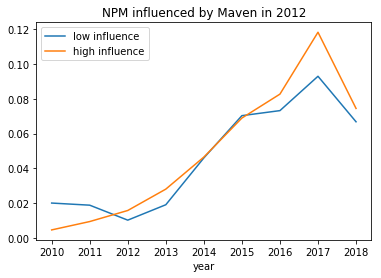

In [137]:
%matplotlib inline
fr = "Maven"; tto="NPM"; yyr=2012
qq = check_influence(fr,tto,yyr,"major_ratio")
qq[qq.influence_high==False]["major_ratio"].unstack("year").dropna(thresh=4).mean(axis=0).plot(label="low influence")
ax = qq[qq.influence_high==True]["major_ratio"].unstack("year").dropna(thresh=4).mean(axis=0).plot(label="high influence")
lines, labels = ax.get_legend_handles_labels()
ax.title.set_text(tto + " influenced by " + fr + " in " + str(yyr))
ax.legend(lines, labels, loc='best')  # legend for first two lines only
    

influence_high  major_ratio_high
False           False               568
                True                 63
True            False               213
                True                 21
Name: major_ratio, dtype: int64
major_ratio_high  False  True 
influence_high                
False               568     63
True                213     21
(0.10005119855137147, 0.7517682024384902, 1, array([[569.72369942,  61.27630058],
       [211.27630058,  22.72369942]]))
In 2016 CRAN packages with high influence from Rubygems are **less** likely to have high level of major_ratio  @ p= 0.7517682024384902
23.625 -2.625 



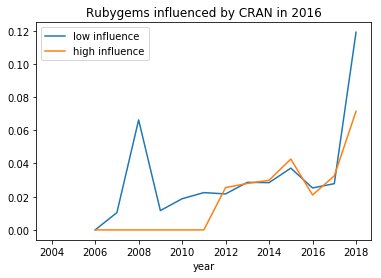

In [138]:
%matplotlib inline
qq = check_influence("Rubygems","CRAN",2016,"major_ratio")
qq[qq.influence_high==False]["major_ratio"].unstack("year").dropna(thresh=4).mean(axis=0).plot(label="low influence")
ax = qq[qq.influence_high==True]["major_ratio"].unstack("year").dropna(thresh=4).mean(axis=0).plot(label="high influence")
lines, labels = ax.get_legend_handles_labels()
ax.title.set_text("Rubygems influenced by CRAN in 2016")
ax.legend(lines, labels, loc='best')  # legend for first two lines only
    

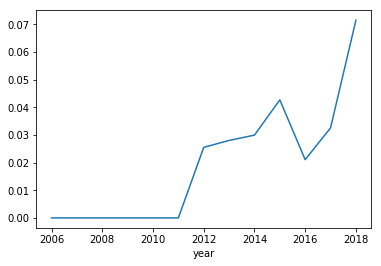

In [114]:
qq[qq.influence_high==True]["major_ratio"].unstack("year").dropna(thresh=4).mean(axis=0).plot()

In [ ]:
def plot_against(qq,from_eco,to_eco,crit_year,practice):
    qq.loc[:,[practice,"influence_high"]].\
    set_index("influence_high",append=True).\
    unstack("year")[practice].\
    reorder_levels(["influence_high","package"]). \
    dropna(thresh=4).\
    sort_index().\
    mean(level=0).T.plot(title=practice + " practice per year, in "+to_eco+" packages with/without "+from_eco+" influence")

In [ ]:
qq.loc[:,["major_ratio","influence_high"]].\
    set_index("influence_high",append=True).\
    unstack("year")["major_ratio"].\
    reorder_levels(["influence_high","package"]). \
    dropna(thresh=4).\
    sort_index().\
    mean(level=0).T.plot(title="Proportion of releases that are major, per year, in NPM packages with/without NuGet influence")

In [ ]:
plot_against(check_influence("NuGet","NPM",2015,"major_ratio"),"NuGet","NPM",2015,"major_ratio")

In [ ]:
plot_against(check_influence("NPM","NuGet",2015,"major_ratio"),"NPM","NuGet",2015,"major_ratio")

In [ ]:
plot_against(check_influence("NPM","CRAN",2015,"major_ratio"),"NPM","CRAN",2015,"major_ratio")

In [ ]:
plot_against(check_influence("CRAN","NPM",2015,"major_ratio"),"CRAN","NPM",2015,"major_ratio")

In [ ]:
plot_against(check_influence("CRAN","CPAN",2015,"major_ratio"),"CRAN","CPAN",2015,"major_ratio")

In [ ]:
plot_against(check_influence("CPAN","NPM",2014,"major_ratio"),"CPAN","NPM",2014,"major_ratio")

In [ ]:
qq.loc[:,["major_ratio","influence_high"]].\
    set_index("influence_high",append=True).\
    unstack("year")["major_ratio"].\
    reorder_levels(["influence_high","package"]). \
    dropna(thresh=4).\
    sort_index()


In [ ]:
check_influence("NPM","CRAN",2015,"major_ratio").loc[:,["major_ratio","influence_high"]].\
    set_index("influence_high",append=True).\
    unstack("year")["major_ratio"].\
    reorder_levels(["influence_high","package"]). \
    dropna(thresh=4).\
    sort_index().\
    mean(level=0).T.plot(title="Proportion of releases that are major, per year, in CRAN packages with/without NPM influence in 2015")

In [ ]:
check_influence("CRAN","NPM",2015,"major_ratio").loc[:,["major_ratio","influence_high"]].\
    set_index("influence_high",append=True).\
    unstack("year")["major_ratio"].\
    reorder_levels(["influence_high","package"]). \
    dropna(thresh=4).\
    sort_index().\
    mean(level=0).T.plot(title="Proportion of releases that are major, per year, in NPM packages with/without CRAN influence in 2015")

In [ ]:
qq.loc[(slice(None),"AeroWizard"),:]

Drawing practice levels for a fixed set of packages that were high-influence as of 2015

In [ ]:
qq = eco_infl_properties("NuGet","NPM")


In [ ]:
q2015 = qq.xs(2015,level=0)
q2015r = q2015[q2015["release"] > 2]
q2015r["influence"].median()

In [ ]:
high_infl_2015 = q2015[q2015["influence"] > q2015["influence"].median() ]
qq["influence_high"] = qq.index.get_level_values(1).isin(high_infl_2015_pkgs)


In [ ]:
len(high_infl_2015), len(low_infl_2015)

In [ ]:
high_infl_2015_pkgs = high_infl_2015.index.values
len(high_infl_2015_pkgs )

In [ ]:
qq["influence_hi"] = qq.index.values.isin(high_infl_2015_pkgs)

In [ ]:
#qq.loc[(slice(None),high_infl_2015_pkgs),:]
qq["influence_hi"] = qq.loc[(2015,high_infl_2015_pkgs),:]
#high_infl_2015_pkgs

In [24]:
qq

alpha  backport  first  major  minor  \
year package                                                                   
2011 AE.Net.Mail                            0         0      1      0      5   
     AeroWizard                             0         0      1      0      1   
     Afterthought                           0         0      1      0      0   
     Agatha-Common-Unity                    0         0      1      0      0   
     Agdur                                  0         0      1      0      1   
     AjaxControlToolkit                     0         0      1      1      0   
     Algorim.CreoleWiki                     0         0      1      0      0   
     AnglicanGeek.Mvc                       0         0      1      0      2   
     Anna                                   0         0      1      0      0   
     Ansl                                   0         0      1      0      0   
     AppEvents                              0         0      1      0      0   
     Args                                   0         0      1      0      0   
     AristojQueryUITheme                    0         0      1      0      0   
     AshMind.Extensions                     0         0      1      0      0   
     Aspirator.MVC3                         0         0      1      0      1   
     AutoBox                                0         0      1      1      0   
     AutoDiff                               0         1      0      0      2   
     AutoMapperAssist                       0         0      1      1      0   
     AutoMoq                                0         0      1      0      3   
     AutoObjectBuilder                      0         0      1      0      0   
     BDDify                                 0         0      1      1     12   
     BDDish                                 0         0      1      0      0   
     BLToolkit.Firebird                     0         0      1      0      0   
     Backbone.js                            0         0      1      0      1   
     BeaconpushSharp                        0         0      1      0      0   
     BingGeocodingHelper                    0         0      1      0      1   
     Blackbird                              0         0      1      0      0   
     Blitz.CSharp                           0         0      1      0      0   
     Blocks.Mvvm                            0         0      1      0      0   
     Brevity                                0         0      1      0      2   
...                                       ...       ...    ...    ...    ...   
2018 spkl                                   0         0      0      0      0   
     sqlSugarCore                           0         0      0      0      0   
     squirrel.windows                       0         0      0      0      0   
     steropes.ui.windows                    0         0      0      1      0   
     stream-net                             0         0      0      0      0   
     streamdecksharp                        0         0      0      0      0   
     swigged.cuda                           0         0      0      0      1   
     swigged.llvm                           0         0      0      1      0   
     teamleader-dotnet                      0         0      0      0      0   
     tesseract.net                          0         1      0      1      0   
     tf-serving-sharp                       0         0      1      0      1   
     tik4net                                0         0      0      0      0   
     tinypubsub                             0         0      0      0      0   
     types-ragemp                           0         0      0      0      0   
     types-ragemp-client                    0         0      0      0      0   
     vCardLib.dll                           0         0      0      0      0   
     vita_core_api.v140                     0         0      1      0      0   
     vstk.clusterclient.transport.http  

In [ ]:
d = pkg_properties.loc[(2015,"NPM"),"major_ratio"]
d[d>.05].sum()
d[d>.01].count()

In [49]:
qq.loc[(slice(None),"spkl"),"major_ratio"]

year  package
2018  spkl       0.0
Name: major_ratio, dtype: float64

In [87]:
qqnpm = eco_infl_properties("Maven","NPM")#.head() 

In [88]:
#qqnpm.loc[(slice(None),"react"),"influence"].plot()
qqnpm.loc[(slice(None),"gulp"),"influence"]#.plot()

year  package
2013  gulp       0.010256
2014  gulp       0.063185
2015  gulp       0.151476
Name: influence, dtype: float64

In [139]:
check_influence("Maven","NPM",2012,"major_ratio")
check_influence("NPM","Maven",2012,"major_ratio")
check_influence("Maven","NPM",2016,"major_ratio")
check_influence("NPM","Maven",2016,"major_ratio")
print ("done")

influence_high  major_ratio_high
False           False               4097
                True                 158
True            False               3058
                True                 254
Name: major_ratio, dtype: int64
major_ratio_high  False  True 
influence_high                
False              4097    158
True               3058    254
(55.842021506273426, 7.853481276257805e-14, 1, array([[4023.32826748,  231.67173252],
       [3131.67173252,  180.32826748]]))
In 2012 NPM packages with high influence from Maven are **more** likely to have high level of major_ratio  @ p= 7.853481276257805e-14
117.93116914815718 136.06883085184282 

influence_high  major_ratio_high
False           False               689
                True                136
True            False               583
                True                110
Name: major_ratio, dtype: int64
major_ratio_high  False  True 
influence_high                
False               689    136
True                583    1

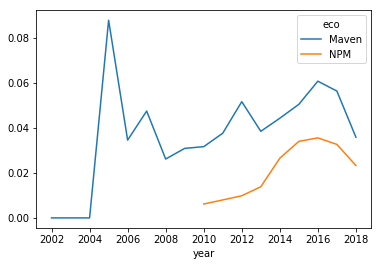

In [97]:
%matplotlib inline
eco_properties.loc[(slice(None),["NPM","Maven"]),"major_ratio"].unstack(level=-1).plot(kind='line')


influence_high  major_ratio_high
False           False               7336
                True                 692
True            False               2003
                True                 398
Name: major_ratio, dtype: int64
major_ratio_high  False  True 
influence_high                
False              7336    692
True               2003    398
(124.16855847583749, 7.738281221766641e-29, 1, array([[7188.94352287,  839.05647713],
       [2150.05647713,  250.94352287]]))
In 2012 Rubygems packages with high influence from CRAN are **more** likely to have high level of major_ratio  @ p= 7.738281221766641e-29
188.94165757906217 209.05834242093783 

influence_high  major_ratio_high
False           False               87
                True                11
True            False               23
                True                 3
Name: major_ratio, dtype: int64
major_ratio_high  False  True 
influence_high                
False                87     11
True                 23     

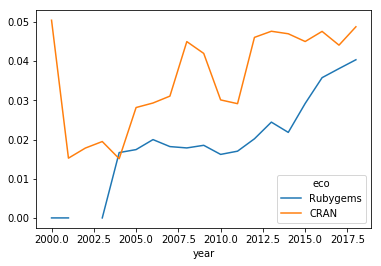

In [98]:
%matplotlib inline
eco_properties.loc[(slice(None),["CRAN","Rubygems"]),"major_ratio"].unstack(level=-1).plot(kind='line')

check_influence("CRAN","Rubygems",2012,"major_ratio")
check_influence("Rubygems","CRAN",2012,"major_ratio")
check_influence("CRAN","Rubygems",2016,"major_ratio")
check_influence("Rubygems","CRAN",2016,"major_ratio")
print ("done")

In [102]:
check_influence("CRAN","Rubygems",2005,"major_ratio")
check_influence("Rubygems","CRAN",2005,"major_ratio")
print("done")

influence_high  major_ratio_high
False           False               1
Name: major_ratio, dtype: int64
major_ratio_high  False
influence_high         
False                 1
(0.0, 1.0, 0, array([[1.]]))
Failed to do check single positional indexer is out-of-bounds
influence_high  major_ratio_high
False           True                1
Name: major_ratio, dtype: int64
major_ratio_high  True
influence_high        
False                1
(0.0, 1.0, 0, array([[1.]]))
Failed to do check single positional indexer is out-of-bounds
done


In [104]:
%matplotlib inline
q1 = check_influence("CRAN","Rubygems",2016,"major_ratio")

#.loc[(slice(None),["CRAN","Rubygems"]),"influence"].unstack(level=-1).plot(kind='line')


influence_high  major_ratio_high
False           False               8880
                True                1415
True            False                252
                True                  79
Name: major_ratio, dtype: int64
major_ratio_high  False  True 
influence_high                
False              8880   1415
True                252     79
(26.363519303180272, 2.828322589268213e-07, 1, array([[8847.53811406, 1447.46188594],
       [ 284.46188594,   46.53811406]]))
In 2016 Rubygems packages with high influence from CRAN are **more** likely to have high level of major_ratio  @ p= 2.828322589268213e-07
40.1554054054054 38.8445945945946 



influence_high  major_ratio_high
False           False               4097
                True                 158
True            False               3058
                True                 254
Name: major_ratio, dtype: int64
major_ratio_high  False  True 
influence_high                
False              4097    158
True               3058    254
(55.842021506273426, 7.853481276257805e-14, 1, array([[4023.32826748,  231.67173252],
       [3131.67173252,  180.32826748]]))
In 2012 NPM packages with high influence from Maven are **more** likely to have high level of major_ratio  @ p= 7.853481276257805e-14
117.93116914815718 136.06883085184282 



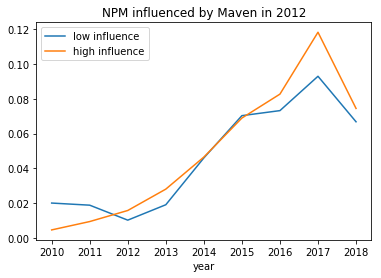

In [140]:
%matplotlib inline
fr = "Maven"; tto="NPM"; yyr=2012
qq = check_influence(fr,tto,yyr,"major_ratio")
qq[qq.influence_high==False]["major_ratio"].unstack("year").dropna(thresh=4).mean(axis=0).plot(label="low influence")
ax = qq[qq.influence_high==True]["major_ratio"].unstack("year").dropna(thresh=4).mean(axis=0).plot(label="high influence")
lines, labels = ax.get_legend_handles_labels()
ax.title.set_text(tto + " influenced by " + fr + " in " + str(yyr))
ax.legend(lines, labels, loc='best')  # legend for first two lines only


influence_high  major_ratio_high
False           False               689
                True                136
True            False               583
                True                110
Name: major_ratio, dtype: int64
major_ratio_high  False  True 
influence_high                
False               689    136
True                583    110
(0.06365703913103887, 0.8008065090319203, 1, array([[691.30434783, 133.69565217],
       [580.69565217, 112.30434783]]))
In 2012 Maven packages with high influence from NPM are **less** likely to have high level of major_ratio  @ p= 0.8008065090319203
115.07692307692308 -5.07692307692308 



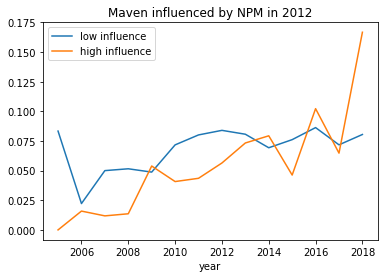

In [141]:
%matplotlib inline
fr = "NPM"; tto="Maven"; yyr=2012
qq = check_influence(fr,tto,yyr,"major_ratio")
qq[qq.influence_high==False]["major_ratio"].unstack("year").dropna(thresh=4).mean(axis=0).plot(label="low influence")
ax = qq[qq.influence_high==True]["major_ratio"].unstack("year").dropna(thresh=4).mean(axis=0).plot(label="high influence")
lines, labels = ax.get_legend_handles_labels()
ax.title.set_text(tto + " influenced by " + fr + " in " + str(yyr))
ax.legend(lines, labels, loc='best')  # legend for first two lines only

influence_high  major_ratio_high
False           False               55318
                True                12613
True            False                1601
                True                  556
Name: major_ratio, dtype: int64
major_ratio_high  False  True 
influence_high                
False             55318  12613
True               1601    556
(70.73529447074307, 4.085182398622528e-17, 1, array([[55167.2838289, 12763.7161711],
       [ 1751.7161711,   405.2838289]]))
In 2015 NPM packages with high influence from CPAN are **more** likely to have high level of major_ratio  @ p= 4.085182398622528e-17
365.0423551104523 190.95764488954768 



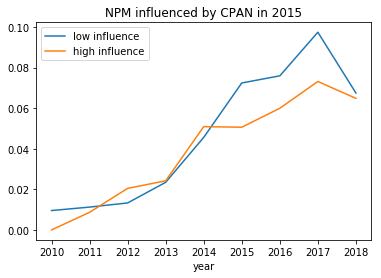

In [154]:

%matplotlib inline
fr = "CPAN"; tto="NPM"; yyr=2015
qq = check_influence(fr,tto,yyr,"major_ratio")
qq[qq.influence_high==False]["major_ratio"].unstack("year").dropna(thresh=4).mean(axis=0).plot(label="low influence")
ax = qq[qq.influence_high==True]["major_ratio"].unstack("year").dropna(thresh=4).mean(axis=0).plot(label="high influence")
lines, labels = ax.get_legend_handles_labels()
ax.title.set_text(tto + " influenced by " + fr + " in " + str(yyr))
ax.legend(lines, labels, loc='best')  # legend for first two lines only


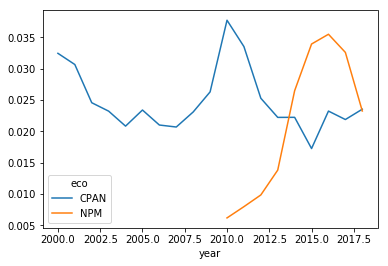

In [151]:
%matplotlib inline
eco_properties.loc[(slice(None),["NPM","CPAN"]),"major_ratio"].unstack(level=-1).plot(kind='line')


In [153]:
check_influence("CPAN","NPM",2015,"major_ratio")
check_influence("NPM","CPAN",2015,"major_ratio")
print("done")

influence_high  major_ratio_high
False           False               55318
                True                12613
True            False                1601
                True                  556
Name: major_ratio, dtype: int64
major_ratio_high  False  True 
influence_high                
False             55318  12613
True               1601    556
(70.73529447074307, 4.085182398622528e-17, 1, array([[55167.2838289, 12763.7161711],
       [ 1751.7161711,   405.2838289]]))
In 2015 NPM packages with high influence from CPAN are **more** likely to have high level of major_ratio  @ p= 4.085182398622528e-17
365.0423551104523 190.95764488954768 

influence_high  major_ratio_high
False           False               1457
                True                  44
True            False                625
                True                  56
Name: major_ratio, dtype: int64
major_ratio_high  False  True 
influence_high                
False              1457     44
True                625

influence_high  major_ratio_high
False           False               55318
                True                12613
True            False                1601
                True                  556
Name: major_ratio, dtype: int64
major_ratio_high  False  True 
influence_high                
False             55318  12613
True               1601    556
(70.73529447074307, 4.085182398622528e-17, 1, array([[55167.2838289, 12763.7161711],
       [ 1751.7161711,   405.2838289]]))
In 2015 NPM packages with high influence from CPAN are **more** likely to have high level of major_ratio  @ p= 4.085182398622528e-17
365.0423551104523 190.95764488954768 

Average high level is  influence_high  major_ratio_high
False           False               0.000000
                True                0.240944
True            False               0.000000
                True                0.171692
Name: major_ratio, dtype: float64


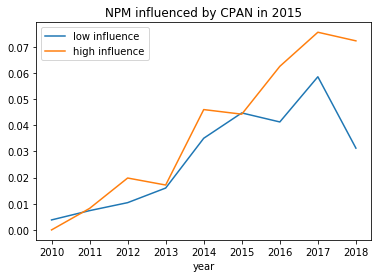

In [162]:
%matplotlib inline
fr = "CPAN"; tto="NPM"; yyr=2015
qq = check_influence(fr,tto,yyr,"major_ratio")
qq[qq.influence_high==False]["major_ratio"].unstack("year").mean(axis=0).dropna(subset=[2015]).plot(label="low influence")
ax = qq[qq.influence_high==True]["major_ratio"].unstack("year").mean(axis=0).dropna(subset=[2015]).plot(label="high influence")
lines, labels = ax.get_legend_handles_labels()
ax.title.set_text(tto + " influenced by " + fr + " in " + str(yyr))
ax.legend(lines, labels, loc='best')  # legend for first two lines only


In [165]:
qq[qq.influence_high==False]["major_ratio"].unstack("year").dropna(subset=[2015])


year,2010,2011,2012,2013,2014,2015,2016,2017,2018
package,,,,,,,,,
canvas,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,NaN,NaN,NaN
coffee-script,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
connect-redis,0.000000,0.083333,0.000000,0.000000,0.250000,0.125000,0.000000,0.000000,NaN
faye,0.000000,0.000000,0.000000,0.166667,0.400000,0.000000,NaN,NaN,NaN
hanging-gardens,0.100000,0.333333,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN
node-dev,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,NaN,NaN,NaN
pg,0.000000,0.000000,0.000000,0.045455,0.120000,0.000000,NaN,NaN,NaN
qrcode,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
strftime,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN


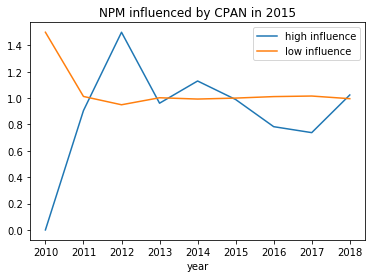

In [205]:
hilos = qq["major_ratio"].unstack("year").dropna(subset=[2015])
(hilos.count(axis=0))
highs = qq[qq.influence_high==True]["major_ratio"].unstack("year").dropna(subset=[2015])
(highs.mean(axis=0)/hilos.mean(axis=0)).plot(label="high influence")
lows = qq[qq.influence_high==False]["major_ratio"].unstack("year").dropna(subset=[2015])
ax = (lows.mean(axis=0)/hilos.mean(axis=0)).plot(label="low influence")
#qq[qq.influence_high==False]["major_ratio"].unstack("year").dropna(subset=[2015]).mean(axis=0).plot(label="low influence")
#ax = qq[qq.influence_high==True]["major_ratio"].unstack("year").dropna(subset=[2015]).mean(axis=0).plot(label="high influence")
lines, labels = ax.get_legend_handles_labels()
ax.title.set_text(tto + " influenced by " + fr + " in " + str(yyr))
ax.legend(lines, labels, loc='best')  # legend for first two lines only


influence_high  major_ratio_high
False           False               55318
                True                12613
True            False                1601
                True                  556
Name: major_ratio, dtype: int64
major_ratio_high  False  True 
influence_high                
False             55318  12613
True               1601    556
(70.73529447074307, 4.085182398622528e-17, 1, array([[55167.2838289, 12763.7161711],
       [ 1751.7161711,   405.2838289]]))
In 2015 NPM packages with high influence from CPAN are **more** likely to have high level of major_ratio  @ p= 4.085182398622528e-17
365.0423551104523 190.95764488954768 

Average high level is  influence_high  major_ratio_high
False           False               0.000000
                True                0.240944
True            False               0.000000
                True                0.171692
Name: major_ratio, dtype: float64


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


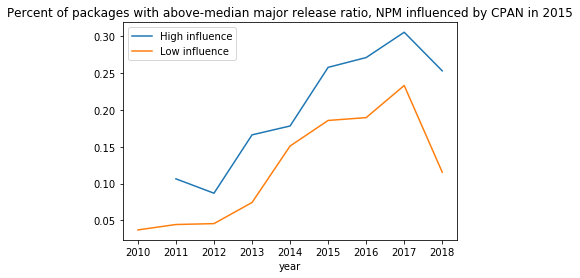

In [275]:
# KEEPER CELL -- Measuring proportional influence instead of averages
%matplotlib inline
fr = "CPAN"; tto="NPM"; yyr=2015
qq = check_influence_yearly(fr,tto,yyr,"major_ratio")
ihicount = qq[qq["influence_high"] == True]["major_ratio_high"].groupby(["year"]).count()
ihiphi = qq[qq["influence_high"] == True][qq["major_ratio_high"]==True]["major_ratio_high"].groupby(["year"]).count()
#sq = qq[qq["influence_high"] == False]["major_ratio_high"]#.groupby(["year","major_ratio_high"]).count()#.unstack("major_ratio_high")
(ihiphi/ihicount).plot(label="High influence")

ilocount = qq[qq["influence_high"] == False]["major_ratio_high"].groupby(["year"]).count()
ilophi = qq[qq["influence_high"] == False][qq["major_ratio_high"]==True]["major_ratio_high"].groupby(["year"]).count()
#sq = qq[qq["influence_high"] == False]["major_ratio_high"]#.groupby(["year","major_ratio_high"]).count()#.unstack("major_ratio_high")
ax = (ilophi/ilocount).plot(label="Low influence")

#qq[qq.influence_high==False]["major_ratio"].unstack("year").dropna(subset=[2015]).mean(axis=0).plot(label="low influence")
#ax = qq[qq.influence_high==True]["major_ratio"].unstack("year").dropna(subset=[2015]).mean(axis=0).plot(label="high influence")
lines, labels = ax.get_legend_handles_labels()
ax.title.set_text("Percent of packages with above-median major release ratio, " + tto + " influenced by " + fr + " in " + str(yyr))
ax.legend(lines, labels, loc='best')  # legend for first two lines only

In [210]:

hi_r = hi[hi.major_ratio_high==True]
highs = qq[qq.influence_high==True][qq.major_ratio_high==True].unstack("year")/ \ qq[qq.influence_high==True].unstack("year")
lows = qq[qq.influence_high==False][qq.major_ratio_high==True].unstack("year").dropna(subset=[2015])/ \
        qq[qq.influence_high==False].unstack("year").dropna(subset=[2015])
highs.plot(label="high influence")
ax = lows.plot(label = "low influence")
ax = (lows.mean(axis=0)/hilos.mean(axis=0)).plot(label="low influence")
#qq[qq.influence_high==False]["major_ratio"].unstack("year").dropna(subset=[2015]).mean(axis=0).plot(label="low influence")
#ax = qq[qq.influence_high==True]["major_ratio"].unstack("year").dropna(subset=[2015]).mean(axis=0).plot(label="high influence")
lines, labels = ax.get_legend_handles_labels()
ax.title.set_text(tto + " influenced by " + fr + " in " + str(yyr))
ax.legend(lines, labels, loc='best')  # legend for first two lines only

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


ZeroDivisionError: float division by zero

In [168]:
qq[qq.influence_high==False]["major_ratio"].unstack("year").dropna(subset=[2015])

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
package,,,,,,,,,
canvas,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,NaN,NaN,NaN
coffee-script,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
connect-redis,0.000000,0.083333,0.000000,0.000000,0.250000,0.125000,0.000000,0.000000,NaN
faye,0.000000,0.000000,0.000000,0.166667,0.400000,0.000000,NaN,NaN,NaN
hanging-gardens,0.100000,0.333333,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN
node-dev,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,NaN,NaN,NaN
pg,0.000000,0.000000,0.000000,0.045455,0.120000,0.000000,NaN,NaN,NaN
qrcode,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
strftime,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [174]:
qq[qq.influence_high==True]["major_ratio"].unstack("year").dropna(subset=[2015]).mean(axis=0)


year
2010    0.000000
2011    0.008229
2012    0.019845
2013    0.017164
2014    0.046016
2015    0.044256
2016    0.062544
2017    0.075587
2018    0.072298
dtype: float64

In [173]:
qq[qq.influence_high==False]["major_ratio"].unstack("year").dropna(subset=[2015]).mean(axis=0)


year
2010    0.019091
2011    0.009205
2012    0.012565
2013    0.017901
2014    0.040435
2015    0.044737
2016    0.080765
2017    0.104028
2018    0.070308
dtype: float64

In [182]:
from_eco = "CPAN"
to_eco = "NPM"
year = 2015
practice = "major_ratio"
infla = eco_infl_properties(from_eco, to_eco)

In [177]:
infla.head()

alpha  backport  first  major  minor  patch  release  same  \
year package                                                                  
2010 Jody            0         0      1      0      0      2        3     0   
     akismet         0         0      1      0      0      5        6     0   
     argsparser      0         0      1      0      0      0        1     0   
     benchmark       0         2      1      0      0      1        4     0   
     bufferlist      0         0      1      0      0      5        6     0   

                 subpatch  subsubpatch    ...      minor_ratio  patch_ratio  \
year package                              ...                                 
2010 Jody               0            0    ...              0.0     0.666667   
     akismet            0            0    ...              0.0     0.833333   
     argsparser         0            0    ...              0.0     0.000000   
     benchmark          0            0    ...              0.0     0.250000   
     bufferlist         0            0    ...              0.0     0.833333   

                 subpatch_ratio  subsubpatch_ratio  first_ratio  same_ratio  \
year package                                                                  
2010 Jody                   0.0                0.0     0.333333         0.0   
     akismet                0.0                0.0     0.166667         0.0   
     argsparser             0.0                0.0     1.000000         0.0   
     benchmark              0.0                0.0     0.250000         0.0   
     bufferlist             0.0                0.0     0.166667         0.0   

                 alpha_ratio                      repo  influence_raw  \
year package                                                            
2010 Jody                0.0          garrensmith_Jody              0   
     akismet             0.0       oozcitak_akismet-js              0   
     argsparser          0.0       kof_node-argsparser              0   
     benchmark           0.0     bestiejs_benchmark.js              0   
     bufferlist          0.0  substack_node-bufferlist              0   

                 influence  
year package                
2010 Jody              0.0  
     akismet           0.0  
     argsparser        0.0  
     benchmark         0.0  
     bufferlist        0.0  

[5 rows x 23 columns]

In [183]:
year=2015
practice = "major_ratio"
infl = infla[infla["release"] > 1]
#active = True #infl["release"] > 1
iy = infl.xs(year,level=0)["influence"]
hiy = iy[iy > iy.median()].index.values
print("Median", iy.median(), hiy)
print(hiy)
infl["influence_high"] = infl.index.get_level_values(1).isin(hiy)
infl[practice + "_high"] = infl[practice] > infl[practice].median()
print(infl[practice].median())
contrast = infl.loc[year,:].groupby(["influence_high",practice + "_high"])[practice].count()
print(infl.loc[year,:].groupby(["influence_high",practice + "_high"])[practice].size())
tbl = contrast.unstack(practice + "_high")
print(tbl)
x2 = chi2_contingency(tbl)
print(x2)
expected = tbl.iloc[1,0]*1.0*tbl.iloc[0,1]/tbl.iloc[0,0]
offset = tbl.iloc[1,1] - expected
direction = "**more**" if offset>0 else "**less**"
if True or x2[1] < .05:
    print("In",year,to_eco,"packages with high influence from",from_eco,
         "are",direction,"likely to have high level of",practice," @ p=",x2[1])
else:
    print("In",year,to_eco,"nothing can be concluded about packages with high influence from",from_eco,
         "and their effect on",direction,"the level of",practice," @ XXX p=",x2[1])
print (expected, offset,"\n")#, tbl)
print ("Average high level is ",infl.loc[year,:].groupby(["influence_high",practice + "_high"])[practice].mean())

Median 0.0 ['1-liners' '12factor-config' '51degrees' ... 'zopf' 'zoquete' 'zrx']
['1-liners' '12factor-config' '51degrees' ... 'zopf' 'zoquete' 'zrx']
0.0
influence_high  major_ratio_high
False           False               55318
                True                12613
True            False                1601
                True                  556
Name: major_ratio, dtype: int64
major_ratio_high  False  True 
influence_high                
False             55318  12613
True               1601    556
(70.73529447074307, 4.085182398622528e-17, 1, array([[55167.2838289, 12763.7161711],
       [ 1751.7161711,   405.2838289]]))
In 2015 NPM packages with high influence from CPAN are **more** likely to have high level of major_ratio  @ p= 4.085182398622528e-17
365.0423551104523 190.95764488954768 

Average high level is  influence_high  major_ratio_high
False           False               0.000000
                True                0.240944
True            False               0.000000

In [185]:
infl[infl.influence_high==True]["major_ratio"].unstack("year").mean(axis=0)

year
2010    0.000000
2011    0.008229
2012    0.019845
2013    0.017164
2014    0.046016
2015    0.044256
2016    0.062544
2017    0.075587
2018    0.072298
dtype: float64

In [190]:
infl.loc[year,:].groupby(["influence_high",practice + "_high"])[practice].mean()

influence_high  major_ratio_high
False           False               0.000000
                True                0.240944
True            False               0.000000
                True                0.171692
Name: major_ratio, dtype: float64

In [191]:
infl.loc[year,:].groupby(["influence_high",practice + "_high"])[practice].count()


influence_high  major_ratio_high
False           False               55318
                True                12613
True            False                1601
                True                  556
Name: major_ratio, dtype: int64